In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from templates import *

In [35]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [49]:
data = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)

batch = data[2]['img'][None]


torch.Size([3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


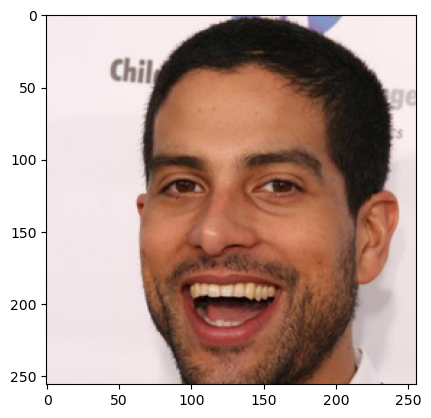

In [39]:
import matplotlib.pyplot as plt

plt.imshow(batch[0].permute([1, 2, 0]) / 2 + 0.5)

# Encode

In [40]:
cond = model.encode(batch.to(device))
xT = model.encode_stochastic(batch.to(device), cond, T=250)


In [41]:
# Randomly sample some noisse maps to see the reconstruction quality given 
# the right semantic code but a random stochastic code

xT_rand1 = torch.randn(size=(1,3,256,256)).to(device)
xT_rand2 = torch.randn(size=(1,3,256,256)).to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 256, 256])


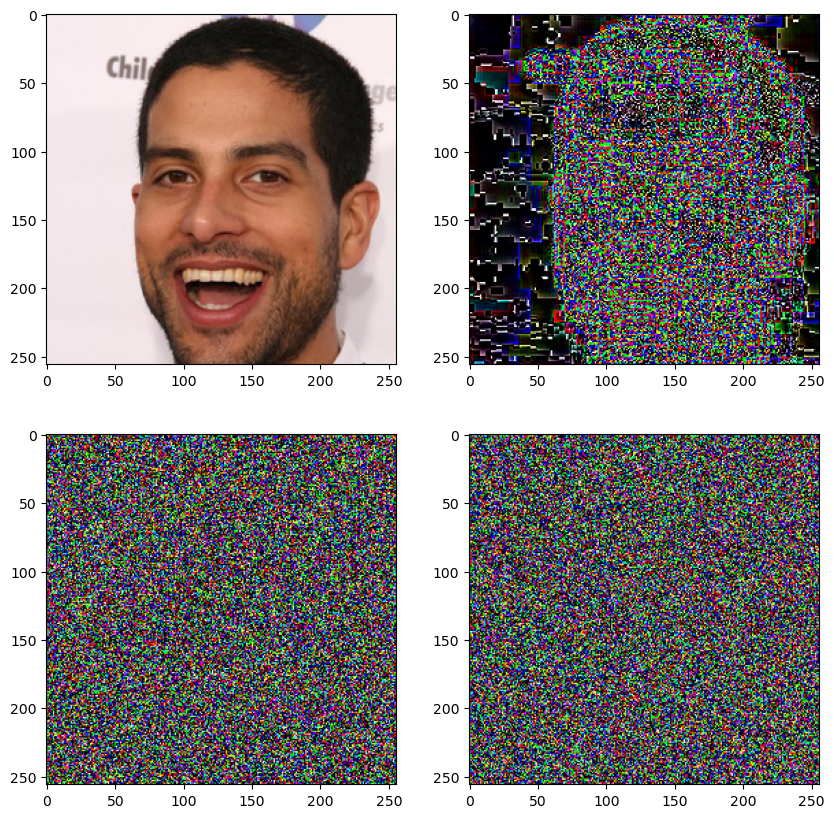

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ori = (batch + 1) / 2

ax[0,0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[0,1].imshow(xT[0].permute(1, 2, 0).cpu())
ax[1,0].imshow(xT_rand1[0].permute(1, 2, 0).cpu())
ax[1,1].imshow(xT_rand2[0].permute(1, 2, 0).cpu())

# Decode

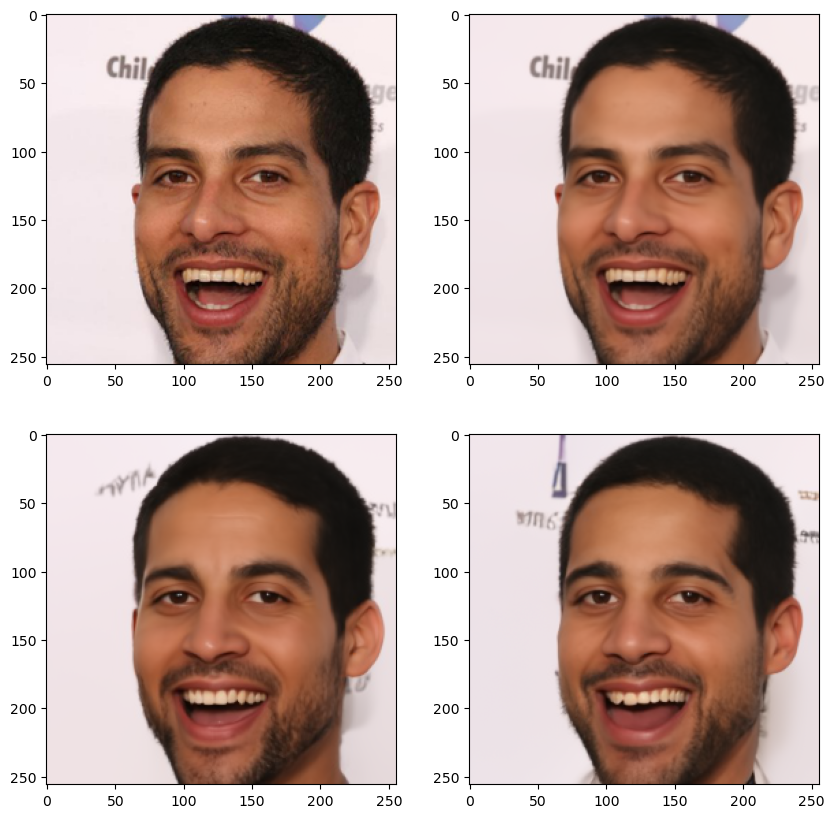

In [43]:
pred = model.render(xT, cond, T=20)
pred_rand1 = model.render(xT_rand1, cond, T=20)
pred_rand2 = model.render(xT_rand2, cond, T=20)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ori = (batch + 1) / 2
ax[0,0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[0,1].imshow(pred[0].permute(1, 2, 0).cpu())
ax[1,0].imshow(pred_rand1[0].permute(1, 2, 0).cpu())
ax[1,1].imshow(pred_rand2[0].permute(1, 2, 0).cpu())